In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from shutil import copyfile
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
csv_path = 'D:/Users/natan/Skripsi/Dataset/Images_dataset/english.csv'
df = pd.read_csv(csv_path)

print(df.head(10))

                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0
5  Img/img001-006.png     0
6  Img/img001-007.png     0
7  Img/img001-008.png     0
8  Img/img001-009.png     0
9  Img/img001-010.png     0


In [3]:
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

In [4]:
folder_path = 'D:/Users/natan/Skripsi/Dataset/Images_dataset/'

# Loop untuk memuat setiap gambar
images = []
for filename in df['image']:
    img = Image.open(folder_path + filename)
    img = img.resize((150, 150))
    img_array = img_to_array(img) / 255.0  # Normalisasi gambar
    images.append(img_array)

In [5]:
images = np.array(images)
print(f"Total gambar: {images.shape[0]}")
print(f"Ukuran setiap gambar: {images.shape[1:]}")

Total gambar: 3410
Ukuran setiap gambar: (150, 150, 3)


In [6]:
width, height = img.size
print("Dimensi gambar (width x height):", width, "x", height)

Dimensi gambar (width x height): 150 x 150


In [7]:
# Mendapatkan daftar file dalam folder
file_list = os.listdir(folder_path)

# Menampilkan daftar file
print("Daftar file dalam folder:")
for file_name in file_list:
    print(file_name)

Daftar file dalam folder:
english.csv
huruf p.png
Img


In [8]:
X = np.array(images)
y = df['label'].values

In [9]:
print("Jumlah gambar:", len(images))
print("Jumlah label:", len(df['label']))

Jumlah gambar: 3410
Jumlah label: 3410


In [10]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi label string menjadi bilangan bulat
y_encoded = label_encoder.fit_transform(y)

In [11]:
# Split dataset menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
  # rescale=1./255,
  rotation_range=20,
  horizontal_flip=True,
  shear_range = 0.2,
  fill_mode = 'nearest'
)

# validation_datagen = ImageDataGenerator()
validation_datagen = ImageDataGenerator(
  rescale=1./255
)

In [13]:
# Mengonversi label menjadi one-hot encoded vector
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [14]:
# Jika y_train_one_hot adalah hasil dari pd.get_dummies(y_train)
class_indices = {label: index for index, label in enumerate(y_train_one_hot.columns)}


In [15]:
num_classes = len(np.unique(y_encoded))  # Menentukan jumlah kelas unik
# y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
# y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

In [16]:
print(num_classes)

62


In [17]:
train_generator = train_datagen.flow(
  X_train, y_train_one_hot,
  batch_size=32,
  shuffle=True
)

validation_generator = validation_datagen.flow(
    X_test, y_test_one_hot,
    batch_size=32,
    shuffle=False
)

In [18]:
# Bangun model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(62, activation='softmax')
])


C:\Users\navi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │        31,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,522,078 (9.62 MB)

 Trainable params: 2,522,078 (9.62 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
x_batch, y_batch = next(train_generator)
print(x_batch.dtype, y_batch.dtype)

float32 uint8


In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//validation_generator.batch_size,
    verbose=1
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.9232 - loss: 0.2227 - val_accuracy: 0.0156 - val_loss: 36.2665
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - accuracy: 0.9062 - loss: 0.1115 - val_accuracy: 0.0500 - val_loss: 16.6203
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.9305 - loss: 0.2012 - val_accuracy: 0.0156 - val_loss: 47.2554
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9688 - loss: 0.1239 - val_accuracy: 0.0500 - val_loss: 22.1382
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9351 - loss: 0.1863 - val_accuracy: 0.0156 - val_loss: 43.9032
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9375 - loss: 0.1643 - val_accuracy: 0.0500 - val_loss: 19.3533
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9242 - loss: 0.2278 - val_accuracy: 0.0156 - val_loss: 36.4880
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9375 - loss: 0.1076 - val_accuracy: 0.0

In [27]:
accuracy = history.history['accuracy'][-1] * 100
print(f'Akurasi model: {accuracy:.2f}%')

Akurasi model: 96.88%


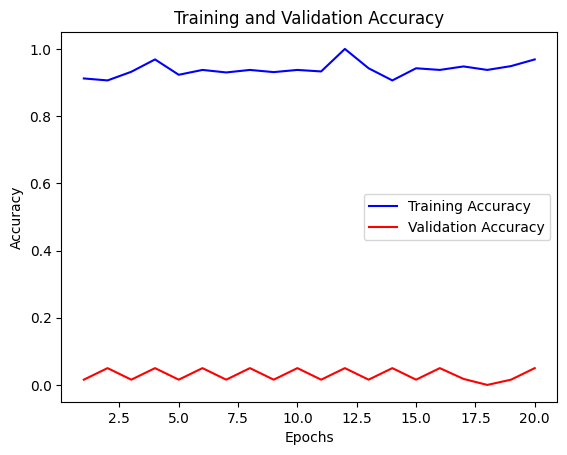

In [28]:
# Ambil data akurasi dari objek history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Ambil jumlah epoch
epochs = range(1, len(train_accuracy) + 1)

# Plot tingkat akurasi train dan validation
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Tampilkan grafik
plt.show()


In [29]:
# Evaluasi model
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2418835163116455
Test accuracy: 0.7368035316467285


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Prediksi: W


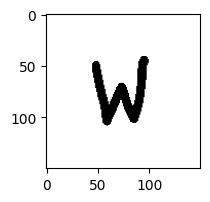

In [33]:
from tensorflow.keras.preprocessing import image

# Meminta pengguna memasukkan path file
path = input("Masukkan path file gambar: ")

# Memproses gambar
img = image.load_img(path, target_size=(150,150))
plt.figure(figsize=(2, 2))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])


uploaded_image_array = tf.keras.preprocessing.image.img_to_array(img)
uploaded_image_array = np.expand_dims(uploaded_image_array, axis=0)

# Melakukan prediksi
predictions = model.predict(uploaded_image_array)

# Contoh penggunaan class_indices untuk mendapatkan label kelas dari prediksi
predicted_class_indices = np.argmax(predictions, axis=1)

# Menerjemahkan prediksi ke label kelas
# class_indices = train_generator.class_indices
predicted_classes = [list(class_indices.keys())[i] for i in predicted_class_indices]

for predicted_class in predicted_classes:
    print(f'Prediksi: {predicted_class}')

stop
